In [118]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [119]:
#Importing the cleaned dataset
dataset_name = 'Data.csv'
df = pd.read_csv(dataset_name)

In [120]:
df.head()

,RecordID,Date,FY,Item Description,Item Category,Cost,Cost Center Level 5,Cost Center Level 4,Management Level,Machine,Count,Time
0,507,2022-07-05 09:08:00,FY23,DVI/VGA Adapter (USB),Cables & Adapters,36.29,Advisory,Deals,Senior Manager,London Office 2 Vending Machine Level 0 L,1,09:08:00
1,608,2022-07-05 10:50:00,FY23,DVI/VGA Adapter (USB),Cables & Adapters,36.29,Advisory,Deals,Manager,London Office 2 Vending Machine Level 0 R,1,10:50:00
2,1400,2022-07-07 14:05:00,FY23,DVI/VGA Adapter (USB),Cables & Adapters,36.29,Advisory,Deals,Senior Manager,Birmingham Vending Machine Level 5,1,14:05:00
3,1510,2022-07-07 18:07:00,FY23,DVI/VGA Adapter (USB),Cables & Adapters,36.29,Assurance,Audit,Manager,London Office 2 Vending Machine Level 3,1,18:07:00
4,2148,2022-07-12 15:38:00,FY23,DVI/VGA Adapter (USB),Cables & Adapters,36.29,Advisory,Deals,Senior Associate,London Office 2 Vending Machine Level 0 R,1,15:38:00


In [121]:
#Data cleaning for datetime
df_date_time = pd.to_datetime(df['Date'])
df_date_time = df_date_time.sort_values() 
df_date_time = df_date_time.reset_index(drop=True)

#Need to get the mean amounnt of purchases made in each Month , Week, and season

1. Get a count of the amount of purchases made for each of those periods

In [122]:

# Define the list of values you want to check against.
day_count = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360]
days_gap = []
days = []
index = []

#checking how many days have passed since the first day
for i in range(len(df['Date'])):
    days_gap.append(df_date_time.iloc[i] - df_date_time.iloc[0])
    days.append(days_gap[i].days)
    
#This indexes the days therefore i know which index each day belongs to
indexed_values = [[i, value] for i, value in enumerate(days, start=1)]

In [123]:
#Getting the indexes of when those days are multiples of 30
for i, (x, y) in enumerate(indexed_values):
    if y % 30 == 0:
        print(indexed_values[i])

[1, 0]
[2, 0]
[3, 0]
[4, 0]
[5, 0]
[6, 0]
[7, 0]
[8, 0]
[9, 0]
[10, 0]
[11, 0]
[12, 0]
[13, 0]
[14, 0]
[15, 0]
[16, 0]
[17, 0]
[18, 0]
[19, 0]
[20, 0]
[21, 0]
[22, 0]
[23, 0]
[24, 0]
[25, 0]
[26, 0]
[27, 0]
[28, 0]
[29, 0]
[30, 0]
[31, 0]
[32, 0]
[33, 0]
[34, 0]
[35, 0]
[36, 0]
[37, 0]
[38, 0]
[39, 0]
[40, 0]
[41, 0]
[42, 0]
[43, 0]
[44, 0]
[45, 0]
[46, 0]
[47, 0]
[48, 0]
[49, 0]
[50, 0]
[51, 0]
[52, 0]
[53, 0]
[54, 0]
[55, 0]
[56, 0]
[57, 0]
[58, 0]
[59, 0]
[60, 0]
[61, 0]
[62, 0]
[63, 0]
[64, 0]
[65, 0]
[66, 0]
[67, 0]
[68, 0]
[69, 0]
[70, 0]
[71, 0]
[72, 0]
[73, 0]
[74, 0]
[75, 0]
[76, 0]
[77, 0]
[78, 0]
[79, 0]
[80, 0]
[81, 0]
[82, 0]
[83, 0]
[84, 0]
[85, 0]
[86, 0]
[87, 0]
[88, 0]
[89, 0]
[90, 0]
[91, 0]
[92, 0]
[93, 0]
[94, 0]
[95, 0]
[96, 0]
[97, 0]
[98, 0]
[99, 0]
[100, 0]
[101, 0]
[102, 0]
[5681, 30]
[5682, 30]
[5683, 30]
[11011, 60]
[11012, 60]
[11013, 60]
[11014, 60]
[11015, 60]
[11016, 60]
[11017, 60]
[11018, 60]
[11019, 60]
[11020, 60]
[11021, 60]
[11022, 60]
[11023, 60]
[

In [124]:
# Create a DataFrame from the reshaped array with default column names
amount_of_items_brought_per_day = pd.DataFrame(indexed_values, columns=['Column1', 'Column2'])

# Rename the columns
amount_of_items_brought_per_day = amount_of_items_brought_per_day.rename(columns={'Column1': 'Item_Number', 'Column2': 'Day'})

In [125]:
#This is where i manually went through the data looking for jumps in the data as there would be where the next multpile of 30 is 
row_separation = [5681 , 11011 , 17473 , 24921 , 32243 , 37912, 44455, 52167  , 60097 , 67889 , 76861 , 84650]

In [126]:
rows_searched = []

#This gets theamount of items that has been brought since each index
for i in range(1 , len(row_separation)):
    rows_searched.append(row_separation[i] - row_separation[i-1])

#appending 0 to the list
rows_searched = [0] + rows_searched

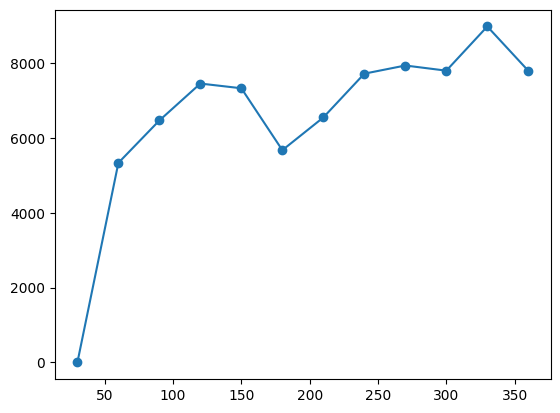

In [127]:
# plotting the linear graph
plt.scatter(day_count , rows_searched)
plt.plot(day_count , rows_searched)

2. Create a line of best fit to see a much clearer pattern and i cans tart working on error bars

In [128]:
#Data Cleaning 
arr_day_count = np.array(day_count)
arr_day_count = arr_day_count.reshape(-1 , 1)
arr_day_count

array([[ 30],
       [ 60],
       [ 90],
       [120],
       [150],
       [180],
       [210],
       [240],
       [270],
       [300],
       [330],
       [360]])

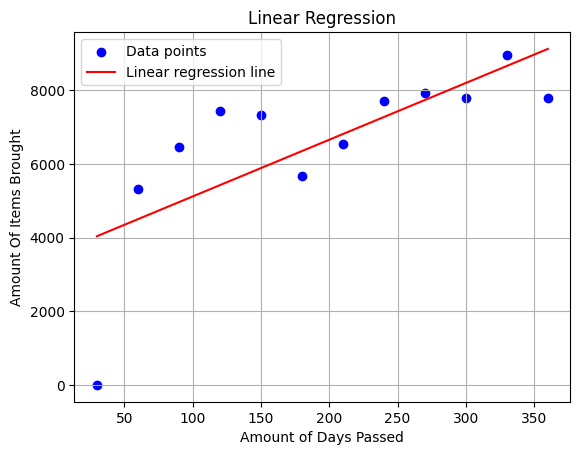

In [129]:
# Create linear regression model
model = LinearRegression()

# Fit the model
model.fit(arr_day_count, rows_searched)

# Make predictions
predictions = model.predict(arr_day_count)

# Plotting the data points and the linear regression line
plt.scatter(day_count, rows_searched, color='blue', label='Data points')
plt.plot(day_count, predictions, color='red', label='Linear regression line')
plt.xlabel('Amount of Days Passed')
plt.ylabel('Amount Of Items Brought')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


In [130]:
print(model.predict([[400]]))

[9739.87645688]


Next i have a general idea of the data i can start to explore the amount of products brought per: LVL 5 , LVL 6 , Management Level, Location , Time

In [141]:
# Extracting three selected columns from the DataFrame
Items_Category_Data = df[['Item Category', 'Date' , 'Count']]

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by the 'Date' column
sorted_Items_Category_df = Items_Category_Data.sort_values(by='Date')


In [142]:
sorted_Items_Category_df.head()

,Item Category,Date,Count
44246,Cables & Adapters,2022-07-01 01:08:00,1
44247,Cables & Adapters,2022-07-01 01:56:00,1
44248,Cables & Adapters,2022-07-01 06:50:00,1
44249,Cables & Adapters,2022-07-01 07:18:00,1
44250,Cables & Adapters,2022-07-01 07:52:00,1


In [149]:
# Grouping the DataFrame by the 'Category' column
grouped_data = df.groupby('Item Category')


KeyError: 'Item Category'